In [1]:
import keras
from keras import regularizers, optimizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, MaxPool2D
from keras import layers
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications.imagenet_utils import preprocess_input

import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [9]:
spotter_data = "C:/Users/Mi Notebook/Desktop/PavlodarCapture/spotter_data/"

In [10]:
dir_list = os.listdir(spotter_data)

In [11]:
dir_list

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero',
 '_background_noise_']

In [12]:
target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
unknown_list = []

for label in dir_list:
    if (label not in target_list) and (label != '_background_noise_'):
        unknown_list.append(label)
        
print('target_list = ', target_list)
print('unknown_list = ', unknown_list)

target_list =  ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
unknown_list =  ['bed', 'bird', 'cat', 'dog', 'eight', 'five', 'four', 'happy', 'house', 'marvin', 'nine', 'one', 'seven', 'sheila', 'six', 'three', 'tree', 'two', 'wow', 'zero']


In [13]:
df_target = pd.DataFrame(columns=['word', 'path'])
df_unknown = pd.DataFrame(columns=['word', 'path'])

In [14]:
for word in target_list:
    
    cur_dir_list = os.listdir(spotter_data + '/' + word)
    
    for path in cur_dir_list:
        
        df_target = df_target.append({'word': word, 'path' : spotter_data + word + '/' + path}, ignore_index=True)

df_target.head()

,word,path
0,yes,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...
1,yes,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...
2,yes,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...
3,yes,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...
4,yes,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...


In [15]:
for word in unknown_list:
    
    cur_dir_list = os.listdir(spotter_data + '/' + word)
    
    for path in cur_dir_list:
        
        df_unknown = df_unknown.append({'word': word, 'path' : spotter_data + word + '/' + path}, ignore_index=True)

df_unknown.head()

,word,path
0,bed,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...
1,bed,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...
2,bed,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...
3,bed,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...
4,bed,C:/Users/Mi Notebook/Desktop/PavlodarCapture/s...


In [16]:
print('Target words dataframe size = ', df_target.shape)
print('Unknown words dataframe size = ', df_unknown.shape)

Target words dataframe size =  (23682, 2)
Unknown words dataframe size =  (41039, 2)


In [17]:
df_target.to_csv('Target_words_dataframe')
df_unknown.to_csv('Unknown_words_dataframe')

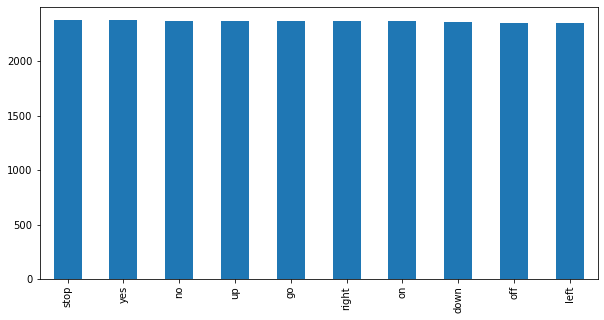

In [37]:
df_target.word.value_counts().plot(kind='bar', figsize=((10, 5)))
plt.savefig("data_hist_1", pad_inches=10)

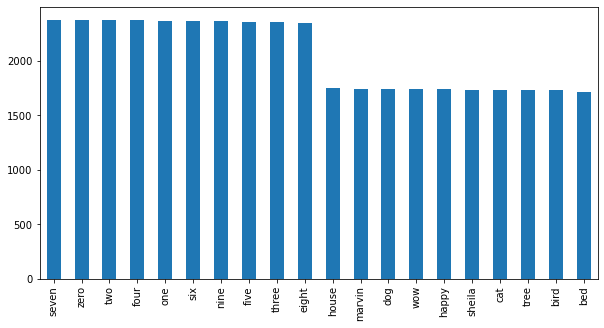

In [38]:
df_unknown.word.value_counts().plot(kind='bar', figsize=((10, 5)))
plt.savefig("data_hist_2", pad_inches=10)